In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from six.moves import cPickle as pickle
import pandas as pd
import gzip
import seaborn as sns
import string
from time import time
import nltk
from nltk.corpus import stopwords 
stops = set(stopwords.words("english"))


from IPython.display import display # Allows the use of display() for DataFrames


import warnings
warnings.filterwarnings('ignore')

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# load the data into panda dataframe
data_file_name = "D:\DEAN\DATA\Electronics.csv"
data = pd.read_csv(data_file_name,delimiter = ",")
print("Data loaded")

# A size for figures
FIG_SIZE = (14,8)

#Random state for classifiers
RAN_STATE = 42

Data loaded


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 20 columns):
reviewerID                 26365 non-null object
asin                       26365 non-null object
reviewerName               26365 non-null object
helpful                    26365 non-null object
unixReviewTime             26365 non-null int64
reviewText                 26365 non-null object
overall                    26365 non-null int64
reviewTime                 26365 non-null object
summary                    26365 non-null object
upvote                     26365 non-null int64
total_votes                26365 non-null int64
No.of Characters           26365 non-null int64
Number of Sentences        26365 non-null int64
No.of Question Marks       26365 non-null int64
No.of Exclamation Marks    26365 non-null int64
no.of Capital              26365 non-null int64
FRE                        26365 non-null float64
ARI                        26365 non-null float64
helpful_rating  

In [3]:
data.head(1)

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
0,A23C0R77ZP9Z84,1400532655,Aeon,"[1, 22]",1298505600,An eReader without e-ink? Really?eReaders are ...,3,"02 24, 2011",Why Would You Want To Do That?,1,22,373,2,3,0,1,72.36,10.2,0.045455,False


In [2]:
#select the columns
df = data.iloc[:, [5,6,11,12,13,14,15,16,17,18,19]]

In [5]:
df

,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
0,An eReader without e-ink? Really?eReaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False
1,I knew about the NOOK Color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True
2,I have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True
3,I bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False
4,I bought it for my PDF library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False
5,I've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True
6,"Before I get started, I'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True
7,EDIT - Update 1.4.1 (12/21/2011): BIG update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True
8,I picked this up as a gift for my teen son. It...,3,773,8,0,1,5,82.44,6.6,0.593750,False
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False


In [6]:
df.describe() 

,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating
count,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000
mean,3.643543,1614.048815,17.135217,0.517997,1.128959,10.137834,73.709346,8.260034,0.747340
std,1.533671,1819.211408,18.656536,1.412210,2.851982,17.555153,11.871167,3.966556,0.267691
min,1.000000,16.000000,1.000000,0.000000,0.000000,0.000000,-480.000000,-2.800000,0.000000
25%,2.000000,524.000000,6.000000,0.000000,0.000000,1.000000,67.650000,6.300000,0.636364
50%,4.000000,1043.000000,11.000000,0.000000,0.000000,5.000000,73.850000,7.900000,0.852941
75%,5.000000,2035.000000,21.000000,0.000000,1.000000,12.000000,80.820000,9.700000,0.939394
max,5.000000,25503.000000,382.000000,35.000000,73.000000,502.000000,133.570000,279.000000,1.000000


In [43]:
#df['helpful_numerator'] = df['helpful'].apply(lambda x: x[0]) 

In [44]:
#df['helpful_denominator'] = df['helpful'].apply(lambda x: x[1])


In [45]:
#del df['helpful']

In [46]:
#print (df.isnull().sum())

overall                0
reviewText             0
helpful_numerator      0
helpful_denominator    0
dtype: int64


TypeError: unsupported operand type(s) for +: 'long' and 'unicode'

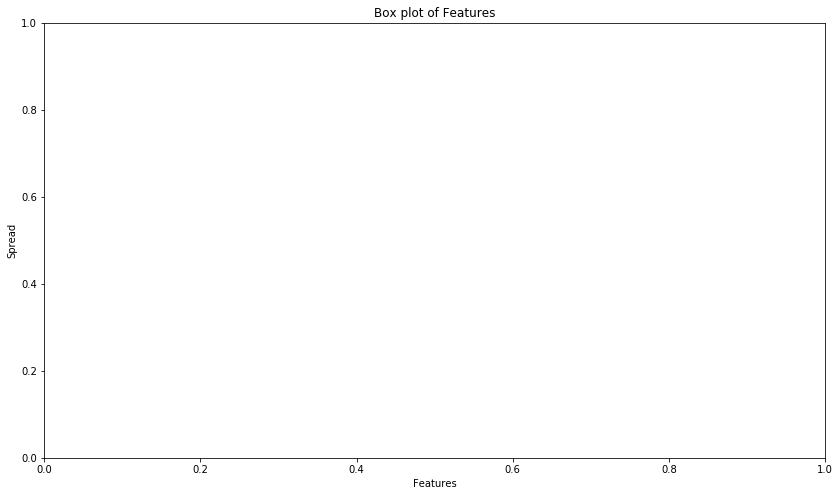

In [47]:
#plt.figure(figsize=FIG_SIZE)
plt.title('Box plot of Features')
plt.ylabel('Spread')
plt.xlabel('Features')

display(sns.boxplot(df[df.columns]))

In [48]:
#print (df['helpful_numerator'].idxmax(axis=0, skipna=True))
#print (df['helpful_denominator'].idxmax(axis=0, skipna=True))

1270097
1270097


,overall,reviewText,helpful_numerator,helpful_denominator
1270097,4,I've been an iPad user since the original came...,30735,31453
1270015,5,My first experience of reading from anything o...,1,2


In [52]:
#df1 = df[(df.helpful_denominator > 10)].copy()
#df1.shape

(97747, 4)

In [53]:
#threshold = 0.5
#df1.loc[:, 'Helpful'] = np.where(df1.loc[:, 'helpful_numerator'] \
                                 / df1.loc[:, 'helpful_denominator'] > threshold, 1, 0)
#df1.head(3)

,overall,reviewText,helpful_numerator,helpful_denominator,Helpful
1,1,"I'm a professional OTR truck driver, and I bou...",12,15,1
2,3,"Well, what can I say. I've had this unit in m...",43,45,1
56,5,Quality was excellent. Instructions were clear...,15,19,1


In [54]:
#print ('Count:')
#display(df1.groupby('Helpful').count())

Count:


,overall,reviewText,helpful_numerator,helpful_denominator
Helpful,,,,
0,11996,11996,11996,11996
1,85751,85751,85751,85751


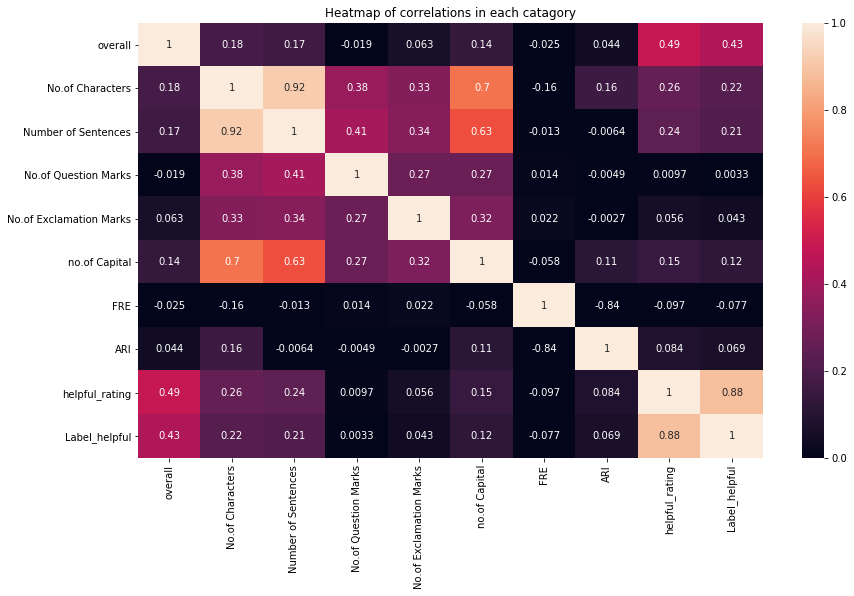

In [3]:

correlations = df.corr()
plt.figure(figsize = FIG_SIZE)
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

In [4]:
df.loc[:, 'reviewText'] = df['reviewText'].str.lower()



In [5]:
def remove_punctuation(text):
    return text.translate(None, string.punctuation.translate(None, '"'))

In [6]:
df1['reviewText']=df1['reviewText'].apply( lambda x: remove_punctuation(x))

NameError: name 'df1' is not defined

In [7]:
df


,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
0,an ereader without e-ink? really?ereaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False
1,i knew about the nook color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True
2,i have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True
3,i bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False
4,i bought it for my pdf library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False
5,i've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True
6,"before i get started, i'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True
7,edit - update 1.4.1 (12/21/2011): big update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True
8,i picked this up as a gift for my teen son. it...,3,773,8,0,1,5,82.44,6.6,0.593750,False
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False


In [8]:
def remove_punctuation(text):
    return text.translate(None, string.punctuation.translate(None, '"'))

In [9]:
df1['reviewText']=df1['reviewText'].apply( lambda x: remove_punctuation(x))

NameError: name 'df1' is not defined

In [10]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [11]:
df["new_column"] = df['reviewText'].apply(remove_punctuations)

In [12]:
df["review_text"] = df['reviewText'].apply(remove_punctuations)

In [40]:
del df['new_column']


KeyError: 'new_column'

In [15]:
df

,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,new_column,review_text
0,an ereader without e-ink? really?ereaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False,an ereader without eink reallyereaders are dev...,an ereader without eink reallyereaders are dev...
1,i knew about the nook color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True,i knew about the nook color even before it was...,i knew about the nook color even before it was...
2,i have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True,i have been working on my fiction writing skil...,i have been working on my fiction writing skil...
3,i bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False,i bought this product used from a coworkers da...,i bought this product used from a coworkers da...
4,i bought it for my pdf library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False,i bought it for my pdf library and to surf the...,i bought it for my pdf library and to surf the...
5,i've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True,ive held off on an ebook reader for a long tim...,ive held off on an ebook reader for a long tim...
6,"before i get started, i'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True,before i get started ill just say that my revi...,before i get started ill just say that my revi...
7,edit - update 1.4.1 (12/21/2011): big update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True,edit update 141 12212011 big update rolled ou...,edit update 141 12212011 big update rolled ou...
8,i picked this up as a gift for my teen son. it...,3,773,8,0,1,5,82.44,6.6,0.593750,False,i picked this up as a gift for my teen son it ...,i picked this up as a gift for my teen son it ...
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False,am about to get a micro card with android c7 a...,am about to get a micro card with android c7 a...


In [37]:
df['review_text'].head(4)

0    an ereader without eink reallyereaders are dev...
1    i knew about the nook color even before it was...
2    i have been working on my fiction writing skil...
3    i bought this product used from a coworkers da...
Name: review_text, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")


In [14]:
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems 

In [15]:
if os.path.exists('features.pickle'):
    print ('Pickled file already present, loading...')
    features = pickle.load( open( "features.pickle", "rb" ) )
    print ('Pickle file loaded.')
else:
    #define the vectorizer
    vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
    #fit the vectorizers to the data.
    features = vectorizer.fit_transform(df['review_text'])
features

<26365x1756 sparse matrix of type '<type 'numpy.float64'>'
	with 2405714 stored elements in Compressed Sparse Row format>

In [17]:
df

,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,new_column,review_text
0,an ereader without e-ink? really?ereaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False,an ereader without eink reallyereaders are dev...,an ereader without eink reallyereaders are dev...
1,i knew about the nook color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True,i knew about the nook color even before it was...,i knew about the nook color even before it was...
2,i have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True,i have been working on my fiction writing skil...,i have been working on my fiction writing skil...
3,i bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False,i bought this product used from a coworkers da...,i bought this product used from a coworkers da...
4,i bought it for my pdf library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False,i bought it for my pdf library and to surf the...,i bought it for my pdf library and to surf the...
5,i've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True,ive held off on an ebook reader for a long tim...,ive held off on an ebook reader for a long tim...
6,"before i get started, i'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True,before i get started ill just say that my revi...,before i get started ill just say that my revi...
7,edit - update 1.4.1 (12/21/2011): big update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True,edit update 141 12212011 big update rolled ou...,edit update 141 12212011 big update rolled ou...
8,i picked this up as a gift for my teen son. it...,3,773,8,0,1,5,82.44,6.6,0.593750,False,i picked this up as a gift for my teen son it ...,i picked this up as a gift for my teen son it ...
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False,am about to get a micro card with android c7 a...,am about to get a micro card with android c7 a...


In [16]:
#shuffling data 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,df['Label_helpful'], test_size=0.2, random_state=RAN_STATE)

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
   
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on roc_auc score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    probas = clf.predict_proba(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [18]:
# Import the supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Initialize the models using a random state were applicable.
clf_list = [ 
            AdaBoostClassifier(random_state = RAN_STATE), 
            RandomForestClassifier(random_state = RAN_STATE), 
            LogisticRegression(random_state = RAN_STATE)]
x_tr = X_train.toarray()
x_te = X_test.toarray()


#sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]

for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_test)

Training a AdaBoostClassifier using a training set size of 10000. . .
Trained model in 15.0510 seconds
Made predictions in 0.6300 seconds.
ROC_AUC score for training set: 0.8159.
Made predictions in 0.3450 seconds.
ROC_AUC score for test set: 0.7560.

Training a AdaBoostClassifier using a training set size of 20000. . .
Trained model in 32.3730 seconds
Made predictions in 1.2650 seconds.
ROC_AUC score for training set: 0.8052.
Made predictions in 0.3450 seconds.
ROC_AUC score for test set: 0.7637.

Training a AdaBoostClassifier using a training set size of 21092. . .
Trained model in 35.1540 seconds
Made predictions in 1.3490 seconds.
ROC_AUC score for training set: 0.8031.
Made predictions in 0.3790 seconds.
ROC_AUC score for test set: 0.7646.

Training a RandomForestClassifier using a training set size of 10000. . .
Trained model in 1.2880 seconds
Made predictions in 0.0850 seconds.
ROC_AUC score for training set: 0.9996.
Made predictions in 0.0470 seconds.
ROC_AUC score for test set

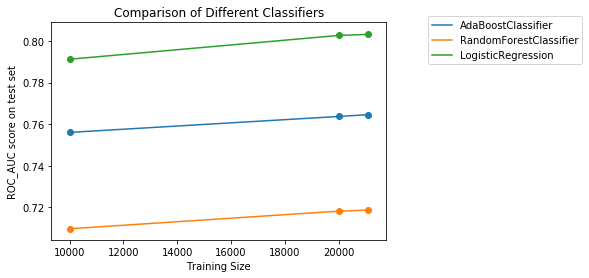

In [19]:
                                                             
for clf in clf_list:
    x_graph = []
    y_graph = []
    for a, b in zip(train_feature_list, train_target_list):
        y_graph.append(clf_test_roc_score(clf, a, b, x_te, y_test))
        x_graph.append(len(a))
    plt.scatter(x_graph,y_graph)
    plt.plot(x_graph,y_graph, label = clf.__class__.__name__)

plt.title('Comparison of Different Classifiers')
plt.xlabel('Training Size')
plt.ylabel('ROC_AUC score on test set')
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.figure(figsize=FIG_SIZE)             
plt.show()

In [47]:
df

,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,new_column,review_text
0,an ereader without e-ink? really?ereaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False,an ereader without eink reallyereaders are dev...,an ereader without eink reallyereaders are dev...
1,i knew about the nook color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True,i knew about the nook color even before it was...,i knew about the nook color even before it was...
2,i have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True,i have been working on my fiction writing skil...,i have been working on my fiction writing skil...
3,i bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False,i bought this product used from a coworkers da...,i bought this product used from a coworkers da...
4,i bought it for my pdf library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False,i bought it for my pdf library and to surf the...,i bought it for my pdf library and to surf the...
5,i've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True,ive held off on an ebook reader for a long tim...,ive held off on an ebook reader for a long tim...
6,"before i get started, i'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True,before i get started ill just say that my revi...,before i get started ill just say that my revi...
7,edit - update 1.4.1 (12/21/2011): big update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True,edit update 141 12212011 big update rolled ou...,edit update 141 12212011 big update rolled ou...
8,i picked this up as a gift for my teen son. it...,3,773,8,0,1,5,82.44,6.6,0.593750,False,i picked this up as a gift for my teen son it ...,i picked this up as a gift for my teen son it ...
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False,am about to get a micro card with android c7 a...,am about to get a micro card with android c7 a...


In [20]:
#add Score column to features
import scipy as scipy

features = pickle.load( open( "features.pickle","rb" ) )
overall = np.array(list(df.overall))
overall = overall.reshape(features.shape[0], 1)

features = scipy.sparse.hstack((features,scipy.sparse.csr_matrix(overall)))

features = scipy.sparse.csr_matrix(features)
features

IOError: [Errno 2] No such file or directory: 'features.pickle'

In [21]:
overall = np.array(list(df.FRE))
overall = overall.reshape(features.shape[0], 1)

In [57]:
features = pickle.load( open( "features.pickle", "rb" ) )
    print ('Pickle file loaded.')

IndentationError: unexpected indent (<ipython-input-57-dce302270314>, line 2)

In [22]:
features = scipy.sparse.hstack((features,scipy.sparse.csr_matrix(overall)))

features = scipy.sparse.csr_matrix(features)

In [32]:
features 

<26365x1758 sparse matrix of type '<type 'numpy.float64'>'
	with 2458444 stored elements in Compressed Sparse Row format>

In [23]:
X_train2, X_test2, y_train, y_test = train_test_split(features, df['Label_helpful'], test_size=0.2, random_state=RAN_STATE)

In [62]:
# optimisation of logistic regression . by k cross validation and by adding new feature . 

,reviewText,overall,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,new_column,review_text
0,an ereader without e-ink? really?ereaders are ...,3,373,2,3,0,1,72.36,10.2,0.045455,False,an ereader without eink reallyereaders are dev...,an ereader without eink reallyereaders are dev...
1,i knew about the nook color even before it was...,3,2345,26,0,0,15,75.24,9.2,0.733333,True,i knew about the nook color even before it was...,i knew about the nook color even before it was...
2,i have been working on my fiction writing skil...,4,2356,16,0,0,2,69.01,8.9,1.000000,True,i have been working on my fiction writing skil...,i have been working on my fiction writing skil...
3,i bought this product used from a coworker's d...,1,1257,14,0,0,11,77.37,8.2,0.600000,False,i bought this product used from a coworkers da...,i bought this product used from a coworkers da...
4,i bought it for my pdf library and to surf the...,3,135,2,0,0,1,88.57,7.1,0.312500,False,i bought it for my pdf library and to surf the...,i bought it for my pdf library and to surf the...
5,i've held off on an e-book reader for a long t...,5,1384,15,0,3,11,78.99,7.7,0.800000,True,ive held off on an ebook reader for a long tim...,ive held off on an ebook reader for a long tim...
6,"before i get started, i'll just say that my re...",4,3076,32,0,0,3,78.89,8.4,0.700000,True,before i get started ill just say that my revi...,before i get started ill just say that my revi...
7,edit - update 1.4.1 (12/21/2011): big update r...,4,9111,71,1,4,35,64.44,12.0,1.000000,True,edit update 141 12212011 big update rolled ou...,edit update 141 12212011 big update rolled ou...
8,i picked this up as a gift for my teen son. it...,3,773,8,0,1,5,82.44,6.6,0.593750,False,i picked this up as a gift for my teen son it ...,i picked this up as a gift for my teen son it ...
9,am about to get a micro card with android c7 a...,4,177,4,0,0,0,88.77,4.6,0.250000,False,am about to get a micro card with android c7 a...,am about to get a micro card with android c7 a...


In [29]:
from sklearn import grid_search, cross_validation
#make the grid search object
gs2 = grid_search.GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.StratifiedKFold(y_train,n_folds=5),
    scoring='roc_auc'
)

#fit the grid search object to our new dataset
print ('Fitting grid search...')
gs2.fit(X_train2, y_train)
print ("Grid search fitted.")

Fitting grid search...


ValueError: Invalid parameter C for estimator RandomForestClassifier. Check the list of available parameters with `estimator.get_params().keys()`.

In [28]:
X_train2

<21092x1757 sparse matrix of type '<type 'numpy.float64'>'
	with 1937588 stored elements in Compressed Sparse Row format>

In [26]:
print (gs2.best_estimator_)
gs2.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

ROC_AUC Score: 0.839421538765


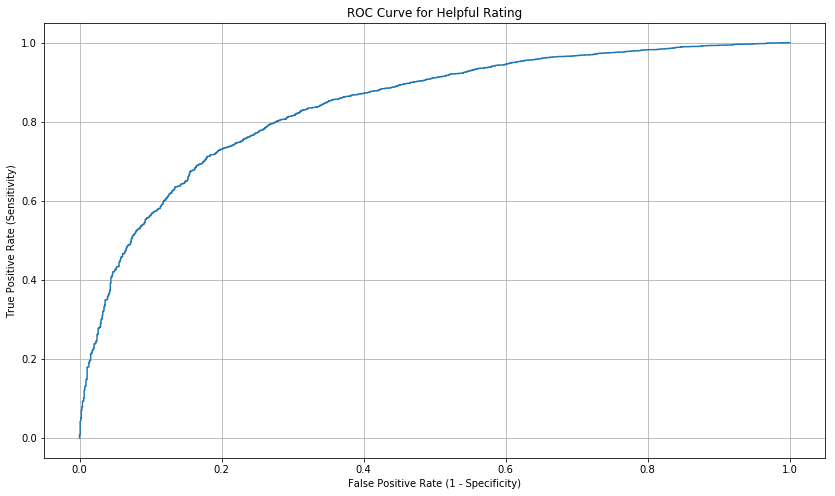

In [36]:
clf2 = gs2.best_estimator_
probas =clf2.predict_proba(X_test2)
plt.figure(figsize = FIG_SIZE)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1])
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show

# ROC/AUC score
print ('ROC_AUC Score:',roc_auc_score(y_test, probas[:,1].T))

In [37]:
random_numbers = range(1,100)
tot = 0.0
for seed in random_numbers:
    clf3 = LogisticRegression(random_state=seed)
    clf3.fit(X_train2, y_train)
    probas =clf3.predict_proba(X_test2)
    tot += roc_auc_score(y_test, probas[:,1].T)
    
print ('Average ROC_AUC Score for 1-100 random_state: {:.4f}'.format(tot/100))

Average ROC_AUC Score for 1-100 random_state: 0.8310


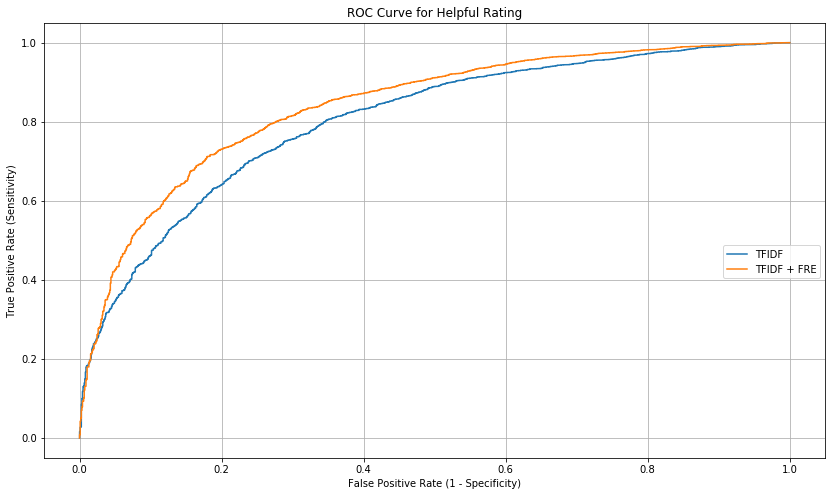

In [43]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
probas = clf.predict_proba(X_test)
clf2 = gs2.best_estimator_
probas2 =clf2.predict_proba(X_test2)
plt.figure(figsize = FIG_SIZE)

plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TFIDF')
plt.plot(roc_curve(y_test, probas2[:,1])[0], roc_curve(y_test, probas2[:,1])[1], label = 'TFIDF + FRE')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE) 
plt.show()

In [51]:
y_train

20347     True
26275     True
22848    False
1365      True
20292     True
575       True
8406     False
1023     False
14311     True
7955      True
4442      True
13384     True
7138      True
12883     True
20329     True
16683    False
8025      True
913      False
10134     True
5061      True
1859     False
509       True
21865    False
21968     True
18876     True
13063     True
6357      True
5245      True
23705     True
2814      True
         ...  
18942     True
25658    False
8666      True
6396      True
19769    False
20939    False
17568     True
6420      True
5051      True
5311      True
2433      True
23333     True
769       True
1685     False
8322     False
16023    False
11363    False
14423     True
21962     True
4426      True
16850     True
6265     False
22118    False
11284     True
11964     True
21575    False
5390      True
860       True
15795     True
23654     True
Name: Label_helpful, Length: 21092, dtype: bool

In [48]:
y_train[y_train < 2.0 ].count()

21092

In [49]:
X_train2[X_train2 < 2.0 ].count()

AttributeError: 'matrix' object has no attribute 'count'

In [50]:
X_train2

<21092x1757 sparse matrix of type '<type 'numpy.float64'>'
	with 1937588 stored elements in Compressed Sparse Row format>